In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('data/speeddating modified.csv')

In [21]:
df_perso = pd.read_csv('data/speeddating personal.csv')

In [22]:
df2 = df.copy()

In [23]:
caractéristiques_fixes = ['race', 'age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [24]:
variables_quantitatives = ['age', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
                          'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
                          'concerts', 'music', 'shopping', 'yoga']

In [25]:
variables_qualitatives = ['race']

#### II) Le cas des hommes

### Dans cette partie, on s'intéresse cette fois-ci aux caractéristiques des femmes que les hommes préfèrent

In [26]:
to_scale_f = df2[df2['gender'] == 'female'][variables_quantitatives]
scaler_f=StandardScaler()
scaler_f.fit(to_scale_f)

StandardScaler()

In [27]:
qltv_df_f = df2[df2['gender'] == 'female'][['race']]
pfl_df_f = pd.get_dummies(qltv_df_f)
pfl_df_f

,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7720,1,0,0,0,0
7721,1,0,0,0,0
7722,1,0,0,0,0
7723,1,0,0,0,0


In [28]:
scaled_features_f = scaler_f.transform(to_scale_f) # Reduce and center the quantitative variables
df_scaled_f = pd.DataFrame(scaled_features_f, columns=variables_quantitatives)
qltv_df_f = df2[df2['gender'] == 'female'][['race']]
pfl_df_f = pd.get_dummies(qltv_df_f)
final_df_f = pd.concat([pfl_df_f.reset_index(), df_scaled_f], axis = 1)
final_df_f.rename(columns = {'race_asian/pacific islander/asian-american' : 'asian',
                             'race_black/african american': 'black',
                             'race_european/caucasian-american': 'caucasian',
                             'race_latino/hispanic american': 'latino'}, inplace = True)
del final_df_f['index']
final_df_f

,asian,black,caucasian,latino,race_other,age,sports,tvsports,exercise,dining,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,1,0,0,0,0,-1.377577,1.192031,-0.829925,0.624805,0.533375,...,-0.945933,-0.371269,-1.006806,1.305191,-3.090718,1.151986,1.439004,0.612232,0.620721,-1.489251
1,1,0,0,0,0,-1.377577,1.192031,-0.829925,0.624805,0.533375,...,-0.945933,-0.371269,-1.006806,1.305191,-3.090718,1.151986,1.439004,0.612232,0.620721,-1.489251
2,1,0,0,0,0,-1.377577,1.192031,-0.829925,0.624805,0.533375,...,-0.945933,-0.371269,-1.006806,1.305191,-3.090718,1.151986,1.439004,0.612232,0.620721,-1.489251
3,1,0,0,0,0,-1.377577,1.192031,-0.829925,0.624805,0.533375,...,-0.945933,-0.371269,-1.006806,1.305191,-3.090718,1.151986,1.439004,0.612232,0.620721,-1.489251
4,1,0,0,0,0,-1.377577,1.192031,-0.829925,0.624805,0.533375,...,-0.945933,-0.371269,-1.006806,1.305191,-3.090718,1.151986,1.439004,0.612232,0.620721,-1.489251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,1,0,0,0,0,-1.107082,0.435837,2.236788,-0.616980,-1.421428,...,1.510939,0.041218,-2.567797,-0.303051,0.239068,1.151986,0.937501,1.225519,-0.227525,-0.746449
4069,1,0,0,0,0,-1.107082,0.435837,2.236788,-0.616980,-1.421428,...,1.510939,0.041218,-2.567797,-0.303051,0.239068,1.151986,0.937501,1.225519,-0.227525,-0.746449
4070,1,0,0,0,0,-1.107082,0.435837,2.236788,-0.616980,-1.421428,...,1.510939,0.041218,-2.567797,-0.303051,0.239068,1.151986,0.937501,1.225519,-0.227525,-0.746449
4071,1,0,0,0,0,-1.107082,0.435837,2.236788,-0.616980,-1.421428,...,1.510939,0.041218,-2.567797,-0.303051,0.239068,1.151986,0.937501,1.225519,-0.227525,-0.746449


In [29]:
x_f = final_df_f
y_f = df2[df2['gender'] == 'female']['decision_o']
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, random_state = 0)

In [30]:
#instanciation du modèle
modele_regLog_f = LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog_f.fit(x_train_f,y_train_f)
#précision du modèle
precision_f = modele_regLog_f.score(x_test_f,y_test_f)
print('précision de la régression logistique:', precision_f*100)

57.801766437684


In [31]:
np.concatenate([modele_regLog_f.intercept_.reshape(-1,1),modele_regLog_f.coef_],axis=1)

array([[-0.09790334, -0.18060095, -0.01353378,  0.06474679,  0.15195936,
        -0.12047476, -0.12296061,  0.0540931 , -0.16178406,  0.20670872,
        -0.03993654,  0.11368187, -0.04327868,  0.07824277, -0.03696433,
         0.06570697,  0.00435553, -0.07152304, -0.05430078, -0.03031436,
         0.02444914, -0.11027501,  0.10213595,  0.00829921]])

In [32]:
results_df_f = pd.DataFrame(np.concatenate([modele_regLog_f.intercept_.reshape(-1,1),
                             modele_regLog_f.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x_f.columns)).T
sorted_df_f = results_df_f.sort_values('coef').transpose()

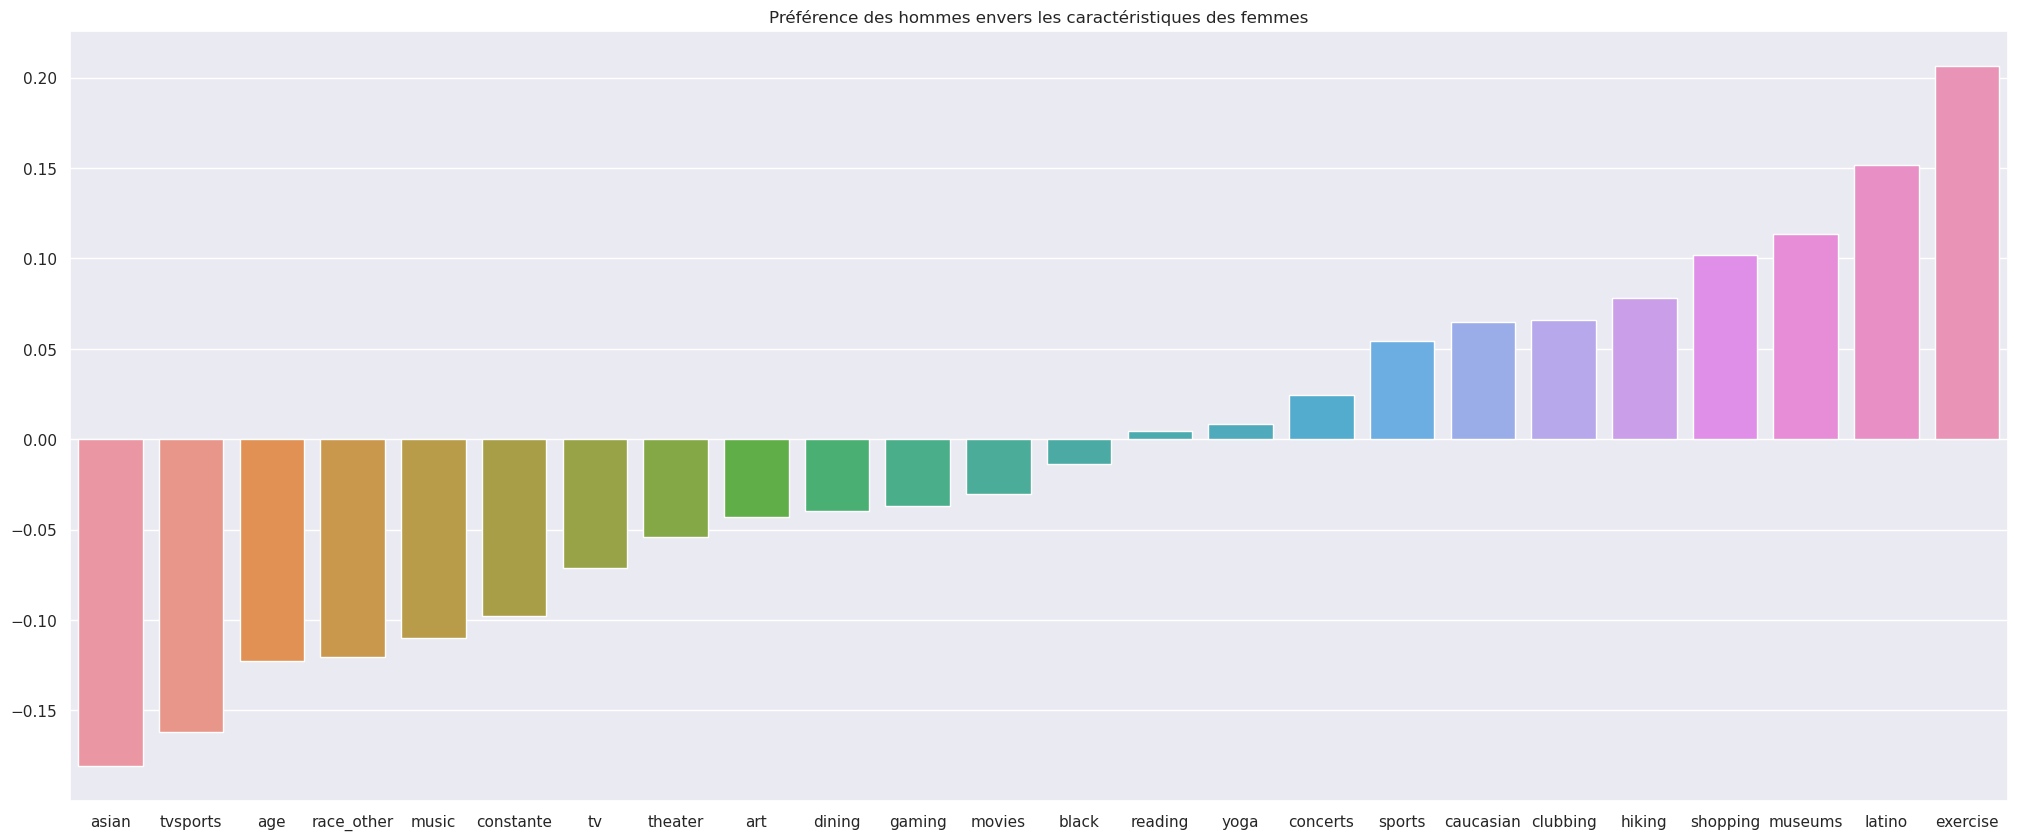

In [33]:
sns.set(rc={'figure.figsize':(25,10)}) # Augmenter la taille du graphique
sns.barplot(sorted_df_f).set(title="Préférence des hommes envers les caractéristiques des femmes")
plt.show()